### For Image classification problem, the most common dataset MNIST dataset has been used here, which is a set of 70000 small images of hand written digits.

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
from numpy import argmax
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

According to Wikipedia, the MNIST database contains 60,000 training images and 10,000 testing photos obtained from American Census Bureau personnel and high school students. As a result, on the second line, I've divided these two groups into train and test, as well as the labels and photos. Greyscale RGB codes (from 0 to 255) are used in the X_train and X_test portions, whereas labels (from 0 to 9) are used in the y_train and y_test parts to indicate which number they are. 

In [2]:
#Downloading the mnist data from tensorflow API

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

5


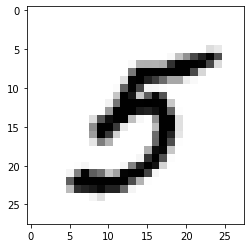

In [3]:
#Visualizing a digit using Matplotlib Library

image_index = 5757 # select anything up to 60,000
print(y_train[image_index])
plt.imshow(X_train[image_index], cmap='Greys')  
#grayscale visualization of RGB colors

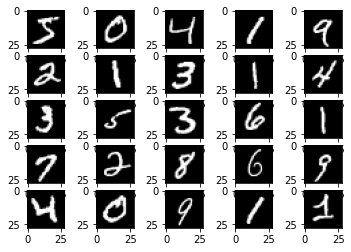

In [4]:
# plotting first few images
for i in range(25):
    # define subplot
    plt.subplot(5, 5, i+1) 
    # plot raw pixel data 
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

    
# show the figure
plt.show()

- To channel the data into CNN architecture, need to know thw shape of the data. 

In [5]:
print(X_train.shape)  #checking the shapes
print(y_train.shape)

(60000, 28, 28)
(60000,)


###### (60000, 28, 28) means :
  - there are 60000 number of images in the train dataset
  - (28,28) represents the each image size = 28x28 pixels

### Reshaping and Normalizing Image data

- Before fitting to the CNN, need to feed a 4D array of shape (batch_size, height, width, depth) 
- Output data from CNN is also a 4D array of shape (batch_size, height, width, depth)
- To add a Dense layer on top of the CNN layer, we have to change the 4D output of CNN to 2D using a Flatten layer.

In [6]:
# Reshaping the array to 4-dimensional array
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
# normalize to scale the pixel values from the default range of 0-255 to 0-1 when training a CNN.
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (60000, 28, 28, 1)
Number of images in X_train 60000
Number of images in X_test 10000


# CNN

In [7]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), kernel_initializer='he_uniform', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [8]:
#model compile
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# fit the model
model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=2)

Epoch 1/10
469/469 - 8s - loss: 0.3229 - accuracy: 0.9023
Epoch 2/10
469/469 - 7s - loss: 0.1588 - accuracy: 0.9531
Epoch 3/10
469/469 - 7s - loss: 0.1177 - accuracy: 0.9639
Epoch 4/10
469/469 - 7s - loss: 0.1009 - accuracy: 0.9689
Epoch 5/10
469/469 - 7s - loss: 0.0850 - accuracy: 0.9743
Epoch 6/10
469/469 - 7s - loss: 0.0726 - accuracy: 0.9767
Epoch 7/10
469/469 - 7s - loss: 0.0637 - accuracy: 0.9797
Epoch 8/10
469/469 - 7s - loss: 0.0621 - accuracy: 0.9797
Epoch 9/10
469/469 - 7s - loss: 0.0580 - accuracy: 0.9812
Epoch 10/10
469/469 - 7s - loss: 0.0538 - accuracy: 0.9823


In [10]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)


Accuracy: 0.984


In [11]:
# make a prediction
image = X_train[5]
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print('Predicted: class=%d' % argmax(pred))

Predicted: class=9


5


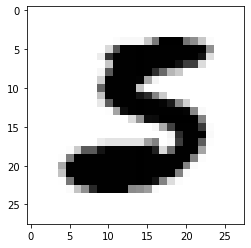

In [12]:
image_index = 7777
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

9


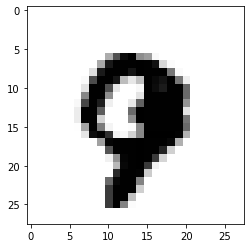

In [13]:
image_index = 5757
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())